# **Transaction and Product Performance Analysis in a Coffe Shop**

# **Import Library**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# **Business Understanding**

## **Dataset**

In [2]:
loc = "/content/drive/MyDrive/praktikum avd/Coffe_sales.csv"
df = pd.read_csv(loc)
df

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,38.70,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50.520000
1,12,card,38.70,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22.539000
2,12,card,38.70,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18.089000
3,13,card,28.90,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,13:46:33.006000
4,13,card,38.70,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,13:48:14.626000
...,...,...,...,...,...,...,...,...,...,...,...
3542,10,card,35.76,Cappuccino,Morning,Sun,Mar,7,3,2025-03-23,10:34:54.894000
3543,14,card,35.76,Cocoa,Afternoon,Sun,Mar,7,3,2025-03-23,14:43:37.362000
3544,14,card,35.76,Cocoa,Afternoon,Sun,Mar,7,3,2025-03-23,14:44:16.864000
3545,15,card,25.96,Americano,Afternoon,Sun,Mar,7,3,2025-03-23,15:47:28.723000


## **Business Objective**

Dataset yang saya gunakan bertujuan untuk mengidentifikasi produk dengan penjualan tertinggi dan menentukan produk yang memberikan kontribusi revenue terbesar.

## **Assess Situation**

Pada saat ini pengambilan keputusan bisnis sering kali dilakukan tanpa analisis terhadap data transaksi. Dengan memanfaatkan data transaksi, kita dapat melakukan analisis untuk membantu dalam memahami performa produk.

## **Analytic Goals**

Saya akan mencoba melakukan analisis yang befokus pada:
*   Perhitungan total penjualan per produk
*   Perhitungan total revenue per produk
*   Analisis kontribusi kategori terhadap total revenue



## **Project Plan**


*   Memahami data
*   Mengolah data
*   Memvisualisasikan data



# **Data Understanding**

## **Informasi Lanjutan**

Pada tahap ini kita dapat memperhatikan sejumlah informasi seperti total jumlah baris dan kolom kemudian ada baris dan tipe data masing masing serta deskripsinya

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3547 entries, 0 to 3546
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   hour_of_day  3547 non-null   int64  
 1   cash_type    3547 non-null   object 
 2   money        3547 non-null   float64
 3   coffee_name  3547 non-null   object 
 4   Time_of_Day  3547 non-null   object 
 5   Weekday      3547 non-null   object 
 6   Month_name   3547 non-null   object 
 7   Weekdaysort  3547 non-null   int64  
 8   Monthsort    3547 non-null   int64  
 9   Date         3547 non-null   object 
 10  Time         3547 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 304.9+ KB


1. hour_of_day
        Jumlah baris: 3547
        Tipe data: int64
        Deskripsi: Jam Transaksi

2. cash_type:
        Jumlah baris: 3547
        Tipe data: object
        Deskripsi: Metode Pembayaran

3. money:
        Jumlah baris: 3547
        Tipe data: float64
        Deskripsi: Jumlah uang

4. coffe_name:
        Jumlah baris: 3547
        Tipe data: object
        Deskripsi: Nama Kopi

5. Time_of_Day:
        Jumlah baris: 3547
        Tipe data: object
        Deskripsi: Kategori Waktu

6. Weekday:
        Jumlah baris: 3547
        Tipe data: object
        Deskripsi: Nama Hari

7. Month_name:
        Jumlah baris: 3547
        Tipe data: object
        Deskripsi: Nama Bulan

8. WeekdaySort:
        Jumlah baris: 3547
        Tipe data: int64
        Deskripsi: Urutan Hari

9. MonthSort:
        Jumlah baris: 3547
        Tipe data: int64
        Deskripsi: Urutan Bulan

10. Date:
        Jumlah baris: 3547
        Tipe data: Object
        Deskripsi: Tanggal

11. Time:
        Jumlah baris: 3547
        Tipe data: float64
        Deskripsi: Waktu

## **Statistik Deskriptif**

In [4]:
df.describe(include='all')

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
count,3547.000000,3547,3547.000000,3547,3547,3547,3547,3547.000000,3547.000000,3547,3547
unique,NaN,1,NaN,8,3,7,12,NaN,NaN,381,3547
top,NaN,card,NaN,Americano with Milk,Afternoon,Tue,Mar,NaN,NaN,2024-10-11,18:11:38.635000
freq,NaN,3547,NaN,809,1205,572,494,NaN,NaN,26,1
mean,14.185791,NaN,31.645216,NaN,NaN,NaN,NaN,3.845785,6.453905,NaN,NaN
std,4.234010,NaN,4.877754,NaN,NaN,NaN,NaN,1.971501,3.500754,NaN,NaN
min,6.000000,NaN,18.120000,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN
25%,10.000000,NaN,27.920000,NaN,NaN,NaN,NaN,2.000000,3.000000,NaN,NaN
50%,14.000000,NaN,32.820000,NaN,NaN,NaN,NaN,4.000000,7.000000,NaN,NaN
75%,18.000000,NaN,35.760000,NaN,NaN,NaN,NaN,6.000000,10.000000,NaN,NaN


1. Count (Kelengkapan Data)
Berdasarkan data, total baris transaksi adalah 3547. Maka dapat disimpulkan:
Seluruh kolom tidak memiliki kehilangan data/missing value (3547 data)



---



2. Mean vs Median (Distribusi Data)

* Kolom houur_of_day
  * Mean = 14.185791
  * Median = 14.000000

Menunjukkan rata-rata transaksi terjadi sekitar jam 14.00.
Karena mean dan median hampir sama jadi distribusinya cukup seimbang.

* Kolom money
 * Mean = 31.645216
 * Median = 32.820000

 Menunjukkan rata-rata uang yang dikeluarkan pada transaksi yaitu sekitar 31–32.

* Kolom Weekdaysort
  * Mean = 3.845785
  * Median = 4.000000  
  Menunjukkan bahwa transaksi paling banyak terjadi di pertengahan minggu pada hari ke 3-4.

* Kolom Monthsort
  * Mean = 6.453905
  * Median = 7.000000
  Menunjukkan bahwa data transaksi terjadi disekitar bulan ke 6 atau ke 7.

## **Cek Tipe Data**

Pada tahap ini kita dapat melakukan pengecekan tipe data dari setiap kolom dan melihat apakah tipe datanya sesuai atau tidak.
Disini terlihat bahwa kolom Date dan kolom Time memiliki tipe data object, seharusnya pada kolom Date bertipe data date dan kolom Time bertipe data time.

In [5]:
df.dtypes

,0
hour_of_day,int64
cash_type,object
money,float64
coffee_name,object
Time_of_Day,object
Weekday,object
Month_name,object
Weekdaysort,int64
Monthsort,int64
Date,object


## **Inconsistent Value**

Pada tahap ini kita melakukan pengecekan terhadap konsistensi nilai pada tiap kolom

In [6]:
print(df['hour_of_day'].unique())

[10 12 13 15 16 18 19 11 14 17  9 20  8 22  7 21  6]


In [7]:
print(df['cash_type'].unique())

['card']


In [8]:
print(df['money'].unique())

[38.7  28.9  33.8  24.   32.82 37.72 27.92 23.02 18.12 35.76 30.86 25.96
 21.06]


In [9]:
print(df['coffee_name'].unique())

['Latte' 'Hot Chocolate' 'Americano' 'Americano with Milk' 'Cocoa'
 'Cortado' 'Espresso' 'Cappuccino']


In [10]:
print(df['Time_of_Day'].unique())

['Morning' 'Afternoon' 'Night']


In [11]:
print(df['Weekday'].unique())

['Fri' 'Sat' 'Sun' 'Mon' 'Tue' 'Wed' 'Thu']


In [12]:
print(df['Month_name'].unique())

['Mar' 'Apr' 'May' 'Jun' 'Jul' 'Aug' 'Sep' 'Oct' 'Nov' 'Dec' 'Jan' 'Feb']


In [13]:
print(df['Weekdaysort'].unique())

[5 6 7 1 2 3 4]


In [14]:
print(df['Monthsort'].unique())

[ 3  4  5  6  7  8  9 10 11 12  1  2]


In [15]:
print(df['Date'].unique())

['2024-03-01' '2024-03-02' '2024-03-03' '2024-03-04' '2024-03-05'
 '2024-03-06' '2024-03-07' '2024-03-08' '2024-03-09' '2024-03-10'
 '2024-03-11' '2024-03-12' '2024-03-13' '2024-03-14' '2024-03-15'
 '2024-03-16' '2024-03-17' '2024-03-18' '2024-03-19' '2024-03-20'
 '2024-03-21' '2024-03-22' '2024-03-23' '2024-03-24' '2024-03-25'
 '2024-03-26' '2024-03-27' '2024-03-28' '2024-03-29' '2024-03-30'
 '2024-03-31' '2024-04-01' '2024-04-02' '2024-04-03' '2024-04-04'
 '2024-04-05' '2024-04-06' '2024-04-07' '2024-04-08' '2024-04-09'
 '2024-04-10' '2024-04-11' '2024-04-12' '2024-04-13' '2024-04-14'
 '2024-04-15' '2024-04-16' '2024-04-17' '2024-04-18' '2024-04-19'
 '2024-04-20' '2024-04-21' '2024-04-22' '2024-04-23' '2024-04-24'
 '2024-04-25' '2024-04-26' '2024-04-27' '2024-04-28' '2024-04-29'
 '2024-04-30' '2024-05-02' '2024-05-03' '2024-05-06' '2024-05-07'
 '2024-05-08' '2024-05-09' '2024-05-10' '2024-05-11' '2024-05-12'
 '2024-05-13' '2024-05-14' '2024-05-15' '2024-05-16' '2024-05-17'
 '2024-05-

In [16]:
print(df['Time'].unique())

['10:15:50.520000' '12:19:22.539000' '12:20:18.089000' ...
 '14:44:16.864000' '15:47:28.723000' '18:11:38.635000']


Dapat disimpulkan bahwa pada tiap kolom tidak ditemukannya inconsistent value

## **Missing Value**

Pada tahap ini kita melakukan pengecekan pada tiap kolom untuk melihat apakah terdapat missing value/nilai yang hilang.

In [17]:
pd.DataFrame(df.isna().sum() / len(df) * 100, columns=['Null Ratio in %'])

,Null Ratio in %
hour_of_day,0.0
cash_type,0.0
money,0.0
coffee_name,0.0
Time_of_Day,0.0
Weekday,0.0
Month_name,0.0
Weekdaysort,0.0
Monthsort,0.0
Date,0.0


Berdasarkan pengecekan missing values pada tiap kolom dataset, tidak ditemukannya nilai kosong dan tiap kolom terisi.

## **Duplicated Values**

Pada tahap ini kita melakukan pengecekkan duplicated values atau nilai yang terduplikasi pada dataset

In [18]:
df[df.duplicated()]

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time


Berdasarkan pengecekan duplicated values pada dataset, tidak ditemukannya nilai yang terduplikasi didalamnya.

## **Outliers Values**

Pada tahap ini kita akan melihat outliers values atau nilai ekstrem pada kolom yang bertipe data kan numerik

In [19]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
hour_of_day,0.0
money,0.0
Weekdaysort,0.0
Monthsort,0.0


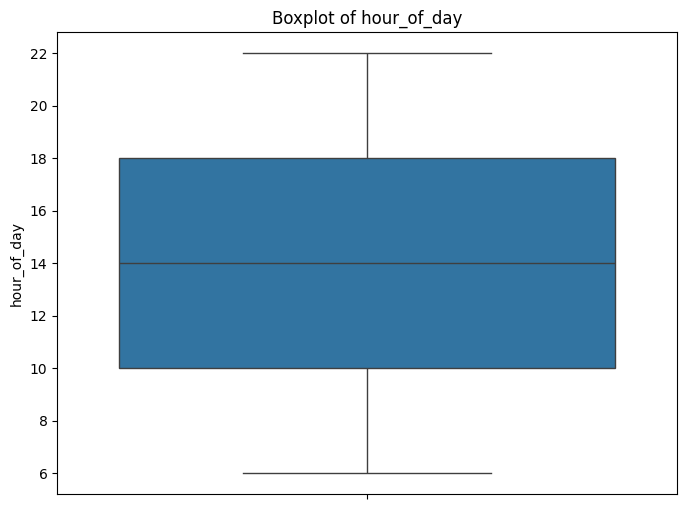

In [20]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['hour_of_day'])
plt.title('Boxplot of hour_of_day')
plt.ylabel('hour_of_day')
plt.show()

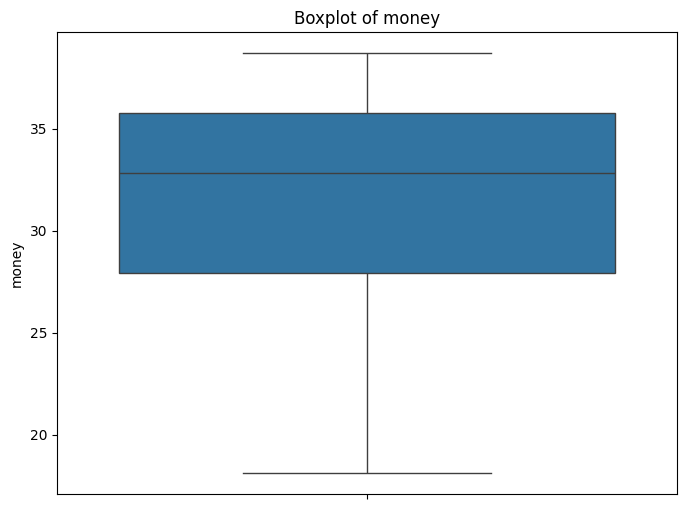

In [21]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['money'])
plt.title('Boxplot of money')
plt.ylabel('money')
plt.show()

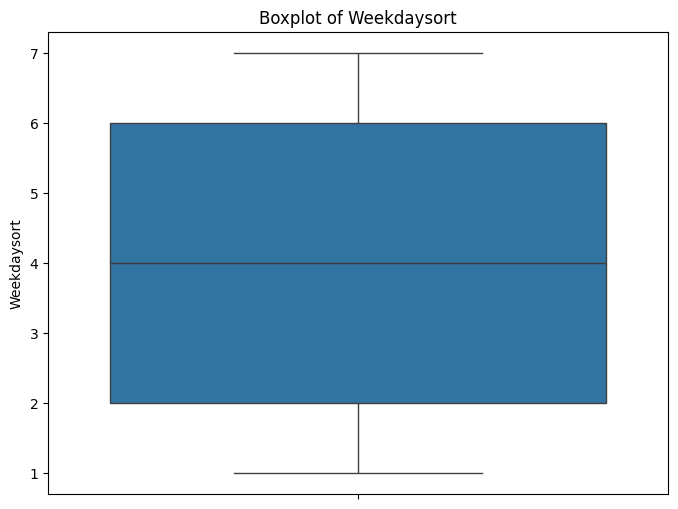

In [22]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['Weekdaysort'])
plt.title('Boxplot of Weekdaysort')
plt.ylabel('Weekdaysort')
plt.show()

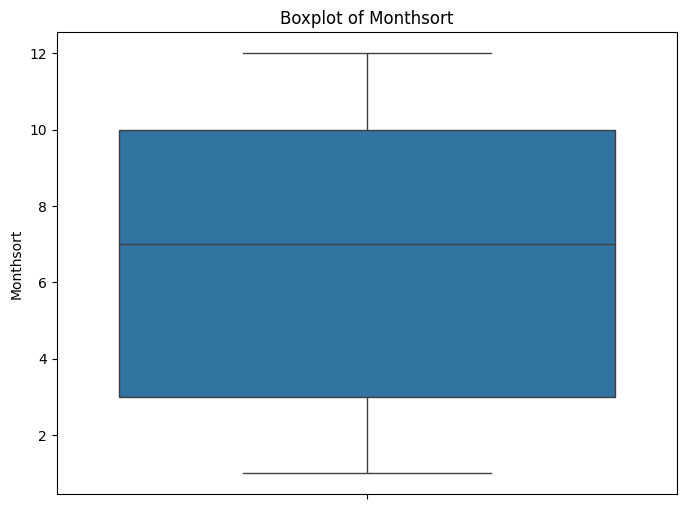

In [23]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['Monthsort'])
plt.title('Boxplot of Monthsort')
plt.ylabel('Monthsort')
plt.show()

Setelah melakukan pengecekan ternyata tidak ditemukannya outliers values pada kolom yang bertipe data numerik pada dataset ini

# **Eksplorasi Data(EDA)**

## **Comparison**

Aktivitas: Membandingkan total nominal penjualan per produk/menu.

Tujuan: mengidentifikasi produk dengan penjualan tertinggi dan menentukan produk yang memberikan kontribusi revenue terbesar.

Visualisasi: Bar Chart.

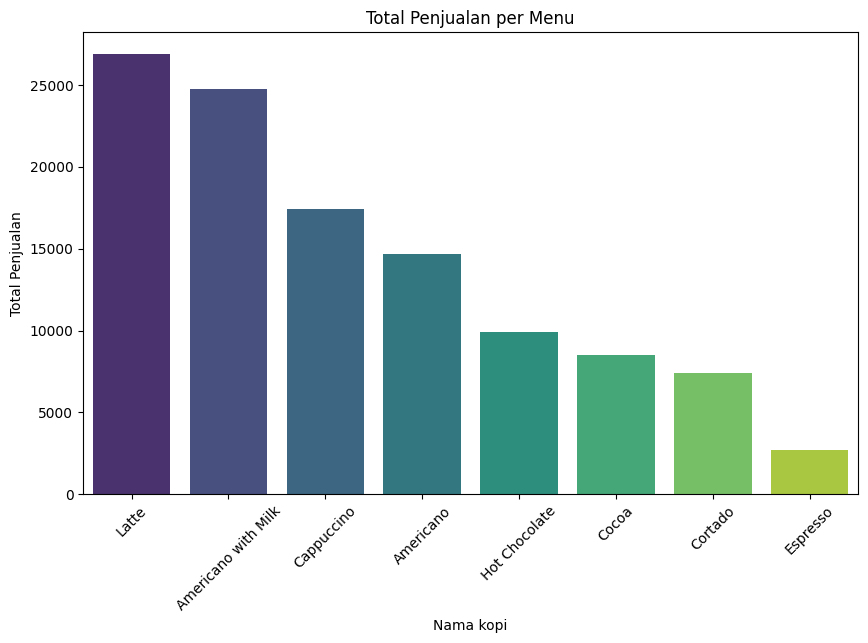

In [24]:
penjualan_market = df.groupby('coffee_name')['money'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=penjualan_market.index, y=penjualan_market.values, palette='viridis', hue=penjualan_market.index, legend=False)
plt.title('Total Penjualan per Menu')
plt.xlabel('Nama kopi')
plt.ylabel('Total Penjualan')
plt.xticks(rotation=45)
plt.show()

## **Composition**

Aktivitas: Melihat komposisi revenue per menu.

Tujuan: Menunjukkan menu mana yang paling berkontribusi terhadap total pendapatan.

Visualisasi: Pie Chart.

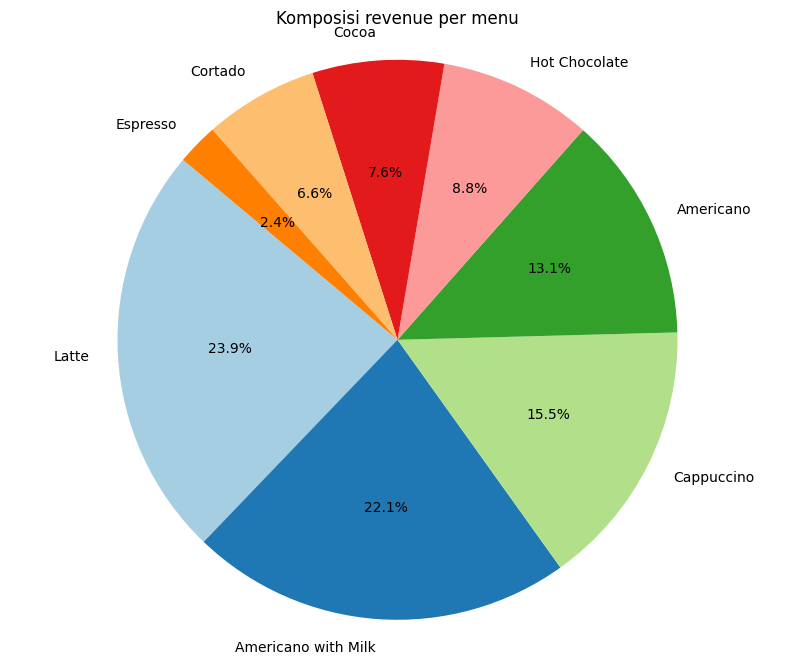

In [25]:
sales_by_category = df.groupby('coffee_name')['money'].sum().sort_values(ascending=False)
sales_by_category_top3 = sales_by_category.head(8)

plt.figure(figsize=(10, 8))
sales_by_category_top3.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Komposisi revenue per menu')
plt.ylabel('')
plt.axis('equal')
plt.show()

## **Distribution**

Aktivitas: Menganalisis penyebaran nilai transaksi pada kolom money.

Tujuan: Melihat apakah ada transaksi dominan di range tertentu, serta mendeteksi adanya kecondongan (skewness) dalam data penjualan.

Visualisasi: Histogram.

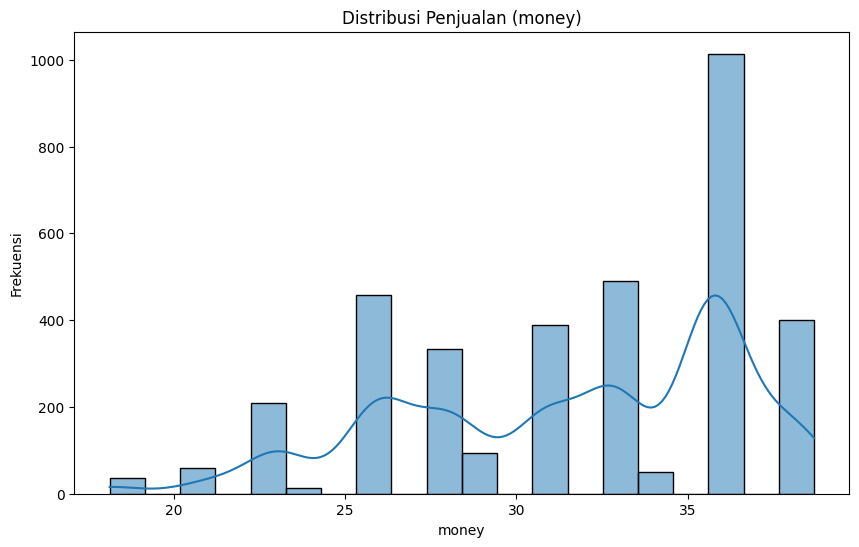

In [26]:
plt.figure(figsize=(10, 6))
sns.histplot(df['money'], bins=20, kde=True)
plt.title('Distribusi Penjualan (money)')
plt.xlabel('money')
plt.ylabel('Frekuensi')
plt.show()

## **Relationship**

Aktivitas: Menganalisis korelasi antara jam transaksi(hour_of_day) dan nilai penjualan(money).

Tujuan: Melihat apakah jam tertentu cenderung menghasilkan transaksi lebih tinggi.

Visualisasi: Heatmap

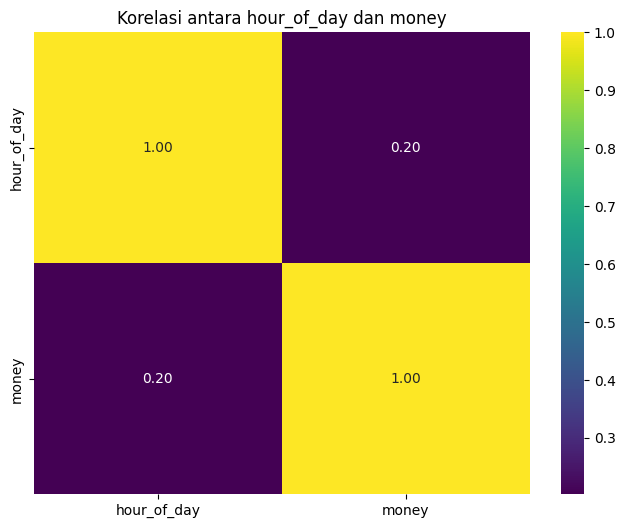

In [27]:
plt.figure(figsize=(8, 6))
sns.heatmap(data=df[['hour_of_day', 'money']].corr(),
            annot=True,
            cmap='viridis',
            fmt='.2f')
plt.title('Korelasi antara hour_of_day dan money')
plt.show()

# **Data Preparation**

## **Inconsistent Values**

disini saya mengubah tipe data pada kolom Date dari object menjadi datetime

In [28]:
df["Date"] = pd.to_datetime(df["Date"], format="mixed")
df["Date"].head(5)

,Date
0,2024-03-01
1,2024-03-01
2,2024-03-01
3,2024-03-01
4,2024-03-01


In [29]:
df["Time"] = pd.to_datetime(df["Time"], format='%H:%M:%S.%f')
df["Time"].head(5)

ValueError: time data "21:23:53" doesn't match format "%H:%M:%S.%f", at position 484. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.